<div class="alert alert-block alert-success">
    
# Imperial Business School  
## Small Assignment - Distributions   
  
</div>

## Loading the required libraries

In [37]:
import pandas as pd
import seaborn as sns

import numpy as np
from decimal import Decimal

import matplotlib.pyplot as plt

print("It ran :)")

It ran :)


## Loading the datasets

In [38]:
df = pd.read_csv('https://raw.githubusercontent.com/vtsou359/Data/main/IBS_BA/titanic.csv')
air = pd.read_csv("https://raw.githubusercontent.com/vtsou359/Data/main/IBS_BA/air_miles.csv")

## Airmiles

**Data on the airmiles covered by different air passenges miles completed by an flight company**

In [39]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   air_passenger_miles  172 non-null    int64
dtypes: int64(1)
memory usage: 1.5 KB


In [40]:
air.head()

,air_passenger_miles
0,46456
1,65524
2,37444
3,54755
4,42418


### The population values

In [41]:
air.head(2)

,air_passenger_miles
0,46456
1,65524


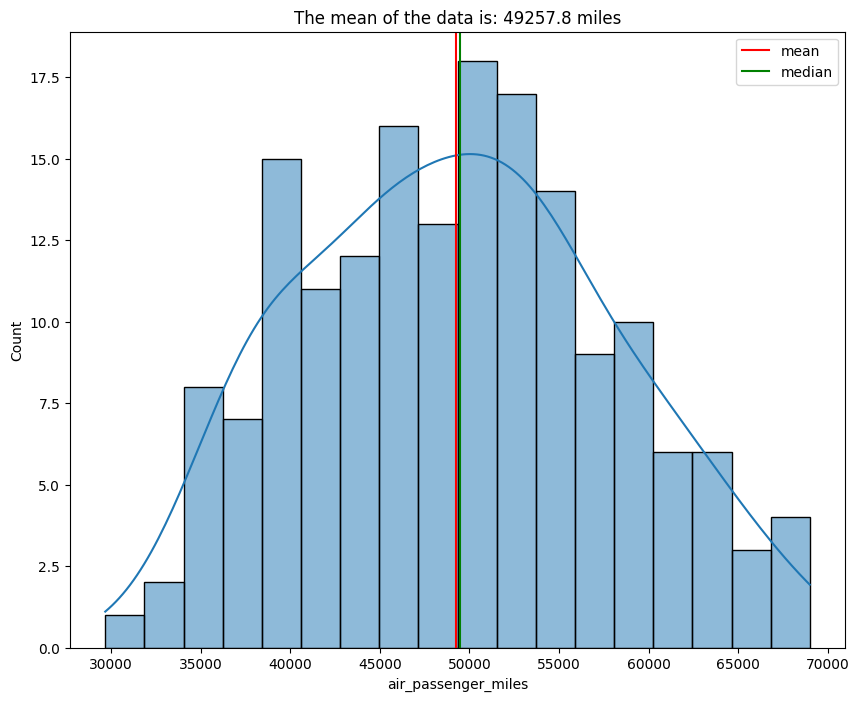

In [42]:
air_mean = round(air.air_passenger_miles.mean(),2)
air_median = air.air_passenger_miles.median()


plt.figure(figsize = (10,8))

sns.histplot(x = 'air_passenger_miles', data = air, kde = True, bins = 18);
plt.axvline(x = air_mean, label = "mean", color = "red");
plt.axvline(x = air_median, label = "median", color = "green")
plt.title("The mean of the data is: " + str(air_mean) + " miles")

plt.legend()
plt.show();

### Take a population sample. 

I have two components, how many times I draw a sample and what is the sample size. 

In [43]:
air_sample_count = 100 # how many people i am asking to collect sample
air_sample_size = 1000 # how many sample they can collect

In [44]:
print("I have a taken {} samples, each with a sample size of {}".format(air_sample_count, air_sample_size))

I have a taken 100 samples, each with a sample size of 1000


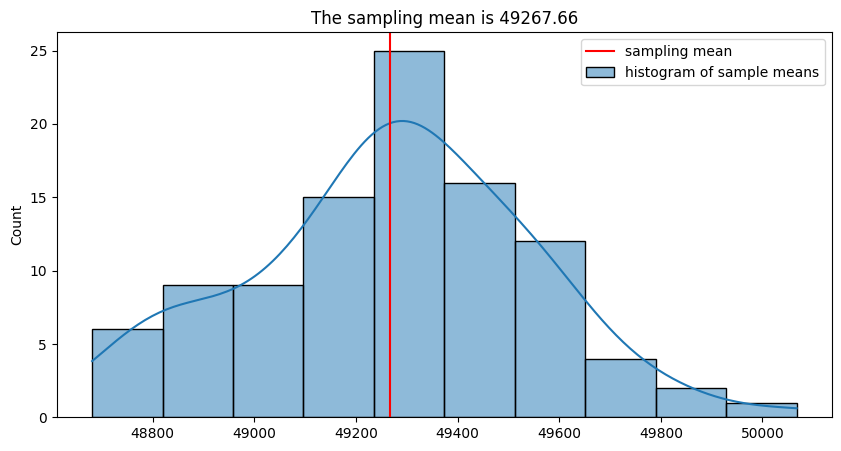

In [45]:
# defining an empty list
air_sample_mean_list = []

for sample in range(1,air_sample_count):
        (air_sample_mean_list.append(round(air.air_passenger_miles.sample(air_sample_size, 
                                                                         random_state = sample, replace=True).mean(),3))
        )
        
# print the mean
sampling_mean = round(np.mean(air_sample_mean_list),2)
# print(sampling_mean)

# plot the histogram
plt.figure(figsize = (10,5))
sns.histplot(air_sample_mean_list, kde = True, label = "histogram of sample means");
plt.axvline(x = sampling_mean, color = "red", label = "sampling mean")
plt.title("The sampling mean is " + str(sampling_mean))
plt.legend();

## Titanic Data
**What is the average fare?**

In [46]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
df.shape

(891, 12)

In [48]:
pop_mean = round(df.Fare.mean(),2)
print("The mean fare is {} dollars".format(pop_mean))

The mean fare is 32.2 dollars


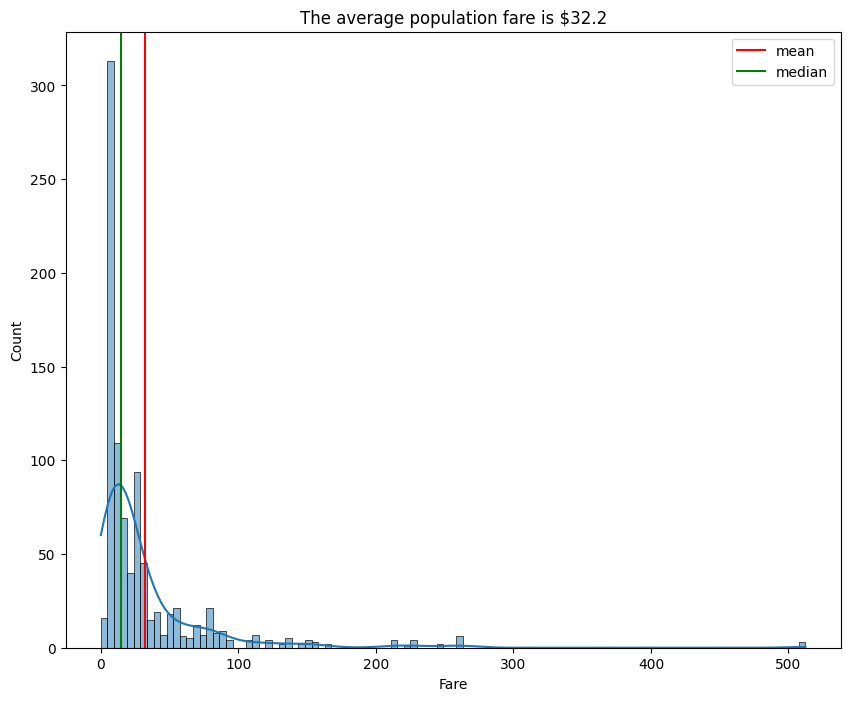

In [49]:
plt.figure(figsize = (10,8))

sns.histplot(x = 'Fare', data = df, kde = True);
plt.axvline(x = pop_mean, label = "mean", color = "red");
plt.axvline(x = df.Fare.median(), label = "median", color = "green")
plt.title("The average population fare is ${}".format(pop_mean))
plt.legend()
plt.show();


## Zoom the view 

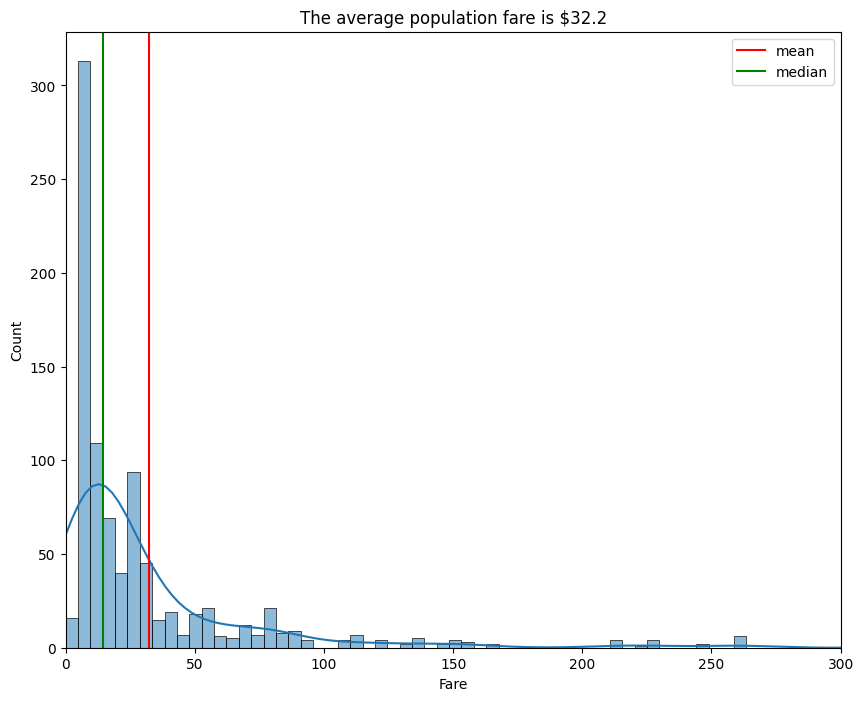

In [50]:
plt.figure(figsize = (10,8))
sns.histplot(x = 'Fare', data = df, kde = True);
plt.axvline(x = pop_mean, label = "mean", color = "red");
plt.axvline(x = df.Fare.median(), label = "median", color = "green")
plt.xlim(0,300)

plt.title("The average population fare is ${}".format(pop_mean))
plt.legend();

## Sampling

In [51]:
sample_size = 5000
sample_count = 1000 # keep the value around 50 for clear CI chart

In [52]:
print("I have a taken {} samples, each with a sample size of {}".format(sample_count, sample_size))

I have a taken 1000 samples, each with a sample size of 5000


32.2


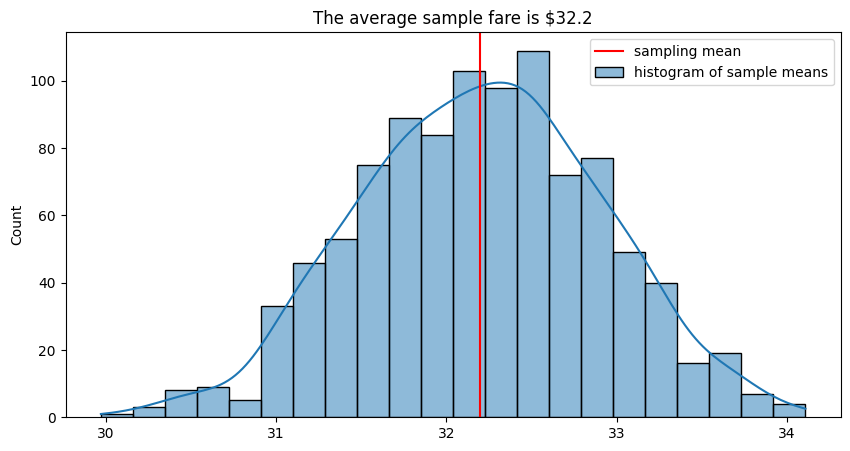

CPU times: total: 547 ms
Wall time: 567 ms


In [53]:
%%time

sample_mean_list = [round(df.Fare.sample(sample_size, replace=True).mean(),3) for x in range(1, sample_count+1)]
sample_sd_list = [round(df.Fare.sample(sample_size, replace=True).std(),3) for x in range(1, sample_count+1)]

        
# print the mean
sampling_mean = round(np.mean(sample_mean_list),2)
print(sampling_mean)

# plot the histogram
plt.figure(figsize = (10,5))
sns.histplot(sample_mean_list, kde = True, label = "histogram of sample means")
plt.axvline(x = sampling_mean, color = "red", label = "sampling mean")
plt.title("The average sample fare is ${}".format(sampling_mean))
plt.legend()

plt.show();

The sampling distribution will be unimodal and symmetric, centered at the true proportion,

## Confidence Interval

95.200 percent of the intervals contain the true mean 32.2 (gray line)
CPU times: total: 4.61 s
Wall time: 4.63 s


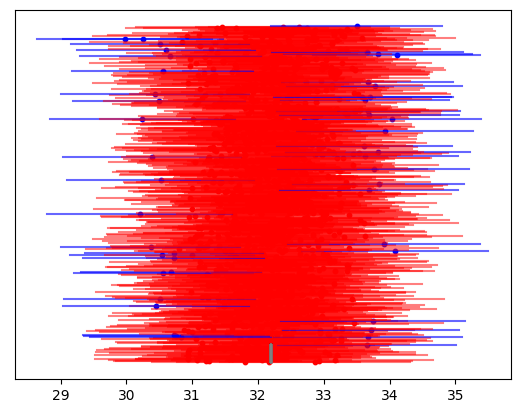

In [54]:
 %%time

 counter = 0

 ax = plt.gca()
 ax.axes.xaxis.set_visible(True) # shows the x-axis values
 ax.axes.yaxis.set_visible(False) # hides the y axis values


for i in range(sample_count):
       
    # summary
    moe = 1.96 * sample_sd_list[i]/np.sqrt(sample_size)
    
    # chart values
    x = [sample_mean_list[i] - moe, sample_mean_list[i] + moe]    # 95% confidence interval
    
    y = [i/30, i/30] # keeps the line plotting changing
    
    
    if sample_mean_list[i]- moe <= 32.2 and 32.2 <= sample_mean_list[i] + moe:  # Updates the counter and colors the interval plot depending on whether or not it includes the true mean
        plt.plot(x,y,color = "red", alpha = 0.5) # intervals with true mean
        plt.scatter(sample_mean_list[i], y[0], s = 10, color = "red")
        counter += 1
    else: 
        plt.plot(x,y,color = "blue", alpha = 0.6) # intervals without true mean
        plt.scatter(sample_mean_list[i], y[0], s = 10, color = "blue")
        
        plt.plot([32.2,32.2],[0,1.75],color="gray") # plots the population mean
        
        
print('{} percent of the intervals contain the true mean 32.2 (gray line)'.format(round(Decimal((counter/sample_count)*100),3)))
